TAREA 4 - Text as Data

Estudiantes:
- Alexander Noblejas 20191966
- Fernanda Pizarro 20191460

In [89]:
# Cargamos el archivo proporcionado para analizar su contenido y preparar los datos para el wordcloud
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Cargando el archivo de texto
file_path = 'Text1english.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    text_data = file.read()

text_data[:1000]  # Mostramos una muestra del texto para verificar la carga y el contenido.

'Chapter 5. Observing a Developing Conflict System:\nThe Maidan Protests in Ukraine 2013/2014\n\n\n    “The Cabinet of Ministers of Ukraine has adopted the resolution on conclusion of the\n    Association Agreement between Ukraine, on the one hand, and the European Union,\n    on the other hand, at its meeting on November 21, 2013, in accordance with which for\n    the benefit of Ukraine’s national security the process of preparing for signing of the\n    Association Agreement between Ukraine and EU is suspended.” (GovUkr 21.11.2013a)\n\n\nImmediately after this statement had become known, about 1.000 citizens came to\nMaidan Nezalezhnosti (“Independence Square”) in the centre of Kiev to protest against\npresident Viktor Yanukovych and his government’s plans not to sign the EU Association\nAgreement. According to the Maidan Monitoring Information Center (MMIC), a Ukrainian\nnon-governmental organisation, social media played a crucial role in helping the\nprotests to gather momentum rig

El archivo ha sido cargado correctamente y contiene texto en inglés que describe eventos y situaciones políticas, específicamente en relación con las protestas de Maidan en Ucrania durante 2013 y 2014. Ahora procederemos a realizar un análisis de texto para generar un wordcloud

In [90]:
type (text_data)

str

In [91]:
import nltk
from nltk.tokenize import word_tokenize

tokens = word_tokenize(text_data)

In [92]:
type(tokens)

list

In [101]:
from collections import Counter
import pandas as pd

tokens = pd.Series(tokens)
tokens

0           chapter
1         observing
2                 a
3        developing
4          conflict
            ...    
43349       details
43350            in
43351          last
43352          part
43353            of
Length: 43354, dtype: object

In [102]:
type(tokens)

pandas.core.series.Series

In [103]:
tokens=tokens[~tokens.str.startswith('http')].reset_index(drop=True)
tokens

0           chapter
1         observing
2                 a
3        developing
4          conflict
            ...    
43340       details
43341            in
43342          last
43343          part
43344            of
Length: 43345, dtype: object

In [136]:
tokens=tokens.str.replace('[^\x01-\x7F]','')
tokens=tokens.str.replace('&amp;','and')
tokens=tokens.str.replace('&lt;|&gt;','')
tokens = tokens.str.replace(r'\d+', '', regex=True)
tokens

0              chapter
1            observing
2           developing
3             conflict
4               system
             ...      
24995    communication
24996              see
24997          details
24998             last
24999             part
Length: 25000, dtype: object

In [147]:
# punctuation
import string
PUNCs=string.punctuation # '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
tokens=tokens.str.replace('['+PUNCs+']', '',regex=True)

# all to lower case
tokens=tokens.str.lower()
tokens

0              chapter
1            observing
2           developing
3             conflict
4               system
             ...      
24995    communication
24996              see
24997          details
24998             last
24999             part
Length: 25000, dtype: object

In [148]:
tokens.value_counts()

ukraine           293
maidan            275
see               273
government        261
conflict          258
                 ... 
democratically      1
unexpectedly        1
scribe              1
cers                1
generalisation      1
Name: count, Length: 5140, dtype: int64

In [149]:
from nltk.corpus import stopwords
STOPS = stopwords.words('english')

tokens=tokens[~tokens.isin(STOPS)].reset_index(drop=True)
tokens

0              chapter
1            observing
2           developing
3             conflict
4               system
             ...      
24995    communication
24996              see
24997          details
24998             last
24999             part
Length: 25000, dtype: object

<Axes: ylabel='Frequency'>

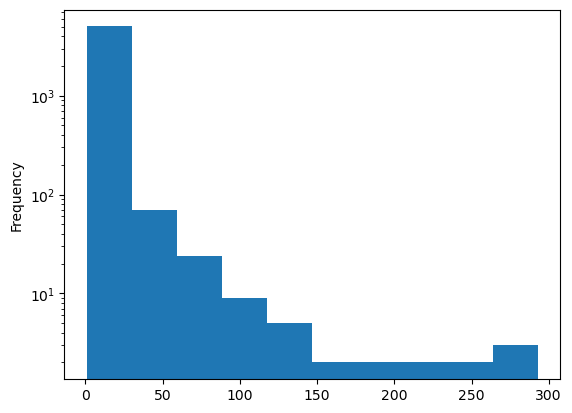

In [150]:
tokens.value_counts().plot(logy=True, kind='hist')

In [151]:
FrequencyTrumpTokens=tokens.value_counts()[tokens.value_counts()>50]
FrequencyTrumpTokens

ukraine         293
maidan          275
see             273
government      261
conflict        258
               ... 
situation        52
orange           52
particularly     52
since            52
parties          52
Name: count, Length: 66, dtype: int64

In [152]:
FrequencyTrumpTokens.to_dict()

{'ukraine': 293,
 'maidan': 275,
 'see': 273,
 'government': 261,
 'conflict': 258,
 'political': 233,
 'euromaidan': 215,
 'protests': 188,
 'society': 185,
 'protesters': 174,
 'ukrainian': 153,
 'media': 143,
 'civil': 132,
 'govukr': 128,
 'mmic': 122,
 'phase': 118,
 'opposition': 117,
 'statements': 110,
 'people': 106,
 'power': 103,
 'also': 99,
 'kyivpost': 99,
 'observing': 98,
 'communication': 92,
 'system': 89,
 'chapter': 87,
 'new': 84,
 'world': 83,
 'force': 78,
 'ukrn': 78,
 'one': 76,
 'economic': 76,
 'within': 75,
 'use': 75,
 'revolution': 75,
 'state': 74,
 'police': 73,
 'russia': 71,
 'point': 70,
 'violence': 70,
 'european': 68,
 'first': 66,
 'thus': 65,
 'national': 65,
 'context': 64,
 'time': 62,
 'escalation': 62,
 'reports': 61,
 'forces': 61,
 'president': 58,
 'according': 58,
 'law': 58,
 'based': 57,
 'social': 56,
 'even': 56,
 'country': 55,
 'discourse': 55,
 'security': 54,
 'analysed': 54,
 'eu': 54,
 'developing': 54,
 'situation': 52,
 'orang

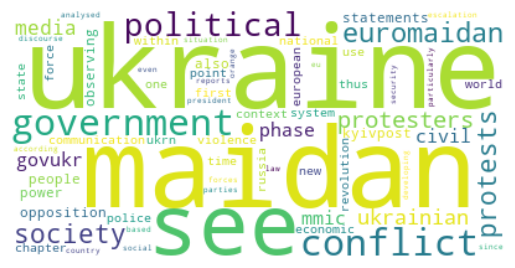

In [153]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud
 
wc1 = WordCloud(background_color='white')
wc1.generate_from_frequencies(frequencies=FrequencyTrumpTokens.to_dict())
plt.figure()
plt.imshow(wc1, interpolation="bilinear")
plt.axis("off")
plt.show()

BIGRAMAS

In [116]:
f = open("Text1english.txt")

textFile=os.path.join('Text1english.txt')
allText=pd.read_table(textFile,header=None)

# see the text
allText

,0
0,Chapter 5. Observing a Developing Conflict Sys...
1,The Maidan Protests in Ukraine 2013/2014
2,“The Cabinet of Ministers of Ukraine has a...
3,"Association Agreement between Ukraine, on ..."
4,"on the other hand, at its meeting on Novem..."
...,...
3915,identities (pro-vs. anti-government) tha...
3916,"fight with all means at hand. Therefore,..."
3917,last phase clearly show a generalisation...
3918,(see details in last part of 5.5.4).


In [137]:
allText[0]=allText[0].str.lower()
allText[0]=allText[0].str.replace('['+PUNCs+']', '',regex=True)
allText[0]=allText[0].str.replace(r'\d+', '', regex=True)

In [138]:
from nltk import bigrams

theBigrams=[bigrams(eachTW.split()) for eachTW in allText[0]]

# list of all bigrams
from itertools import chain
pairWords = list(chain(*theBigrams))
pairWords

[('chapter', 'observing'),
 ('observing', 'a'),
 ('a', 'developing'),
 ('developing', 'conflict'),
 ('conflict', 'system'),
 ('the', 'maidan'),
 ('maidan', 'protests'),
 ('protests', 'in'),
 ('in', 'ukraine'),
 ('“the', 'cabinet'),
 ('cabinet', 'of'),
 ('of', 'ministers'),
 ('ministers', 'of'),
 ('of', 'ukraine'),
 ('ukraine', 'has'),
 ('has', 'adopted'),
 ('adopted', 'the'),
 ('the', 'resolution'),
 ('resolution', 'on'),
 ('on', 'conclusion'),
 ('conclusion', 'of'),
 ('of', 'the'),
 ('association', 'agreement'),
 ('agreement', 'between'),
 ('between', 'ukraine'),
 ('ukraine', 'on'),
 ('on', 'the'),
 ('the', 'one'),
 ('one', 'hand'),
 ('hand', 'and'),
 ('and', 'the'),
 ('the', 'european'),
 ('european', 'union'),
 ('on', 'the'),
 ('the', 'other'),
 ('other', 'hand'),
 ('hand', 'at'),
 ('at', 'its'),
 ('its', 'meeting'),
 ('meeting', 'on'),
 ('on', 'november'),
 ('november', 'in'),
 ('in', 'accordance'),
 ('accordance', 'with'),
 ('with', 'which'),
 ('which', 'for'),
 ('the', 'benefit')

In [139]:
pairWords_clean = [gram for gram in pairWords if not any(stop in gram for stop in STOPS)]
print(pairWords_clean)

[('chapter', 'observing'), ('developing', 'conflict'), ('conflict', 'system'), ('maidan', 'protests'), ('“the', 'cabinet'), ('association', 'agreement'), ('one', 'hand'), ('european', 'union'), ('ukraine’s', 'national'), ('national', 'security'), ('association', 'agreement'), ('suspended”', 'govukr'), ('become', 'known'), ('citizens', 'came'), ('maidan', 'nezalezhnosti'), ('nezalezhnosti', '“independence'), ('“independence', 'square”'), ('president', 'viktor'), ('viktor', 'yanukovych'), ('government’s', 'plans'), ('eu', 'association'), ('agreement', 'according'), ('maidan', 'monitoring'), ('monitoring', 'information'), ('information', 'center'), ('center', 'mmic'), ('nongovernmental', 'organisation'), ('organisation', 'social'), ('social', 'media'), ('media', 'played'), ('crucial', 'role'), ('gather', 'momentum'), ('momentum', 'right'), ('three', 'days'), ('days', 'later'), ('largest', 'demonstration'), ('demonstration', 'since'), ('orange', 'revolution'), ('took', 'place'), ('kyiv', '

In [140]:
from collections import Counter

bigramsCount_dict = Counter(pairWords_clean) #generate counter

# Turn bigramsCount_dict  into dataframe, naming columns
bigramsCount = pd.DataFrame(bigramsCount_dict.most_common(),
                        columns=['theBigram', 'weight'])
bigramsCount

,theBigram,weight
0,"(maidan, protests)",87
1,"(civil, society)",83
2,"(conflict, system)",60
3,"(see, eg)",57
4,"(world, society)",55
...,...,...
9343,"(hand, therefore)",1
9344,"(therefore, observations)",1
9345,"(phase, clearly)",1
9346,"(clearly, show)",1


In [141]:
bigramsCount['word1'], bigramsCount['word2'] =zip(*bigramsCount['theBigram'])
bigramsCount

,theBigram,weight,word1,word2
0,"(maidan, protests)",87,maidan,protests
1,"(civil, society)",83,civil,society
2,"(conflict, system)",60,conflict,system
3,"(see, eg)",57,see,eg
4,"(world, society)",55,world,society
...,...,...,...,...
9343,"(hand, therefore)",1,hand,therefore
9344,"(therefore, observations)",1,therefore,observations
9345,"(phase, clearly)",1,phase,clearly
9346,"(clearly, show)",1,clearly,show


In [142]:
import networkx as nx

G_bigram=nx.from_pandas_edgelist(df=bigramsCount, source='word1',target= 'word2',edge_attr= ["weight"])

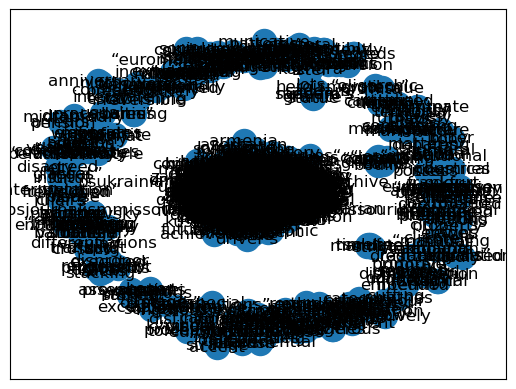

In [143]:
# plotting graph (default layout)
nx.draw_networkx(G_bigram)

In [144]:
#subsetting
bigramsCount_wgte_3=bigramsCount[bigramsCount['weight']>=3]

G_bigram_wgte_3=nx.from_pandas_edgelist(df=bigramsCount_wgte_3, source='word1',target= 'word2',edge_attr= ["weight"])

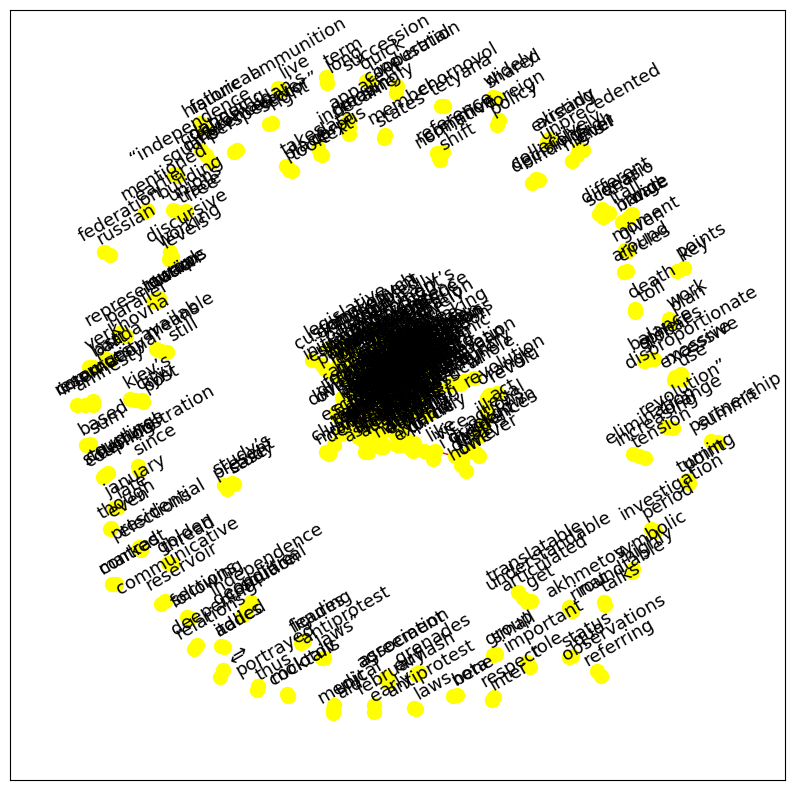

In [145]:
#plotting    
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(G_bigram_wgte_3)

# Plot networks
nx.draw_networkx(G_bigram_wgte_3, pos,
                 edge_color='red',node_color='yellow',
                 node_size=100,with_labels = False,ax=ax)

# labels away from node
for word, freq in pos.items():
    x, y = freq[0]+.05, freq[1]+.03
    ax.text(x, y,s=word,horizontalalignment='center', 
            fontsize=13,rotation=30)
    
plt.show()

C:\Users\alexa\AppData\Local\Temp\ipykernel_17792\3843452.py:12: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G_bigram_wgte_3, pos, edgelist=[edge], width=2*edge[2])


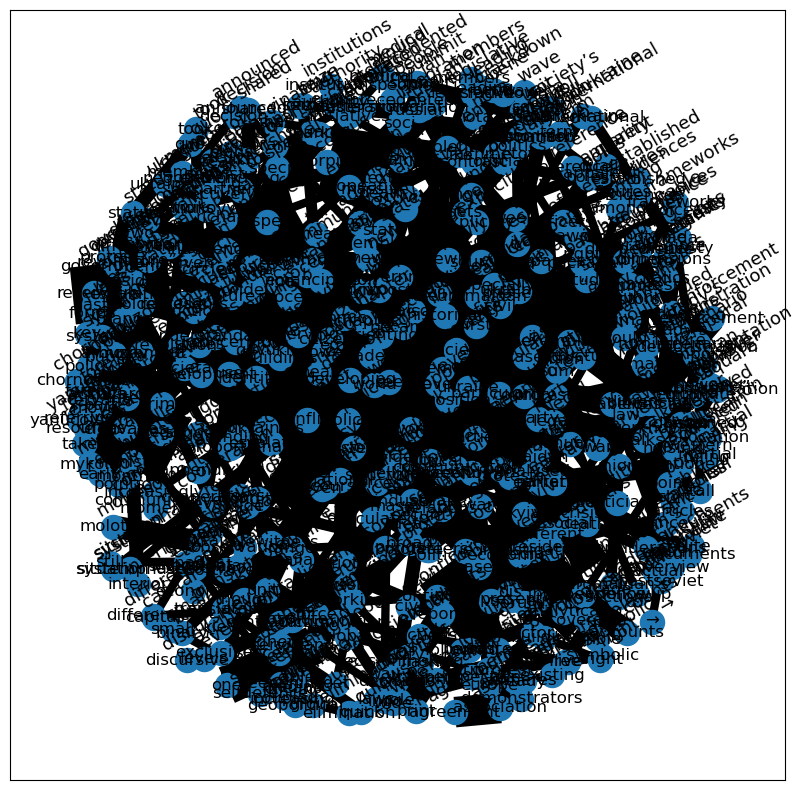

In [146]:
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(G_bigram_wgte_3, weight='weight',k=0.6)
nx.draw_networkx(G_bigram_wgte_3, pos)

# labels away from node
for word, freq in pos.items():
    x, y = freq[0]+.05, freq[1]+.03
    ax.text(x, y,s=word,horizontalalignment='center', 
            fontsize=13,rotation=30)

for edge in G_bigram_wgte_3.edges(data='weight'):
    nx.draw_networkx_edges(G_bigram_wgte_3, pos, edgelist=[edge], width=2*edge[2])